<a href="https://colab.research.google.com/github/stewieboomhauer/SNLP_OLIDv1.0/blob/main/olidTask_snlp(SimpleTransformer_models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import pickle
import sys
import re
import os
import xml.etree.ElementTree as et
from collections import Counter
import nltk
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from simpletransformers.classification import ClassificationModel

-------------------------------------------------------
# **1. Loading Data**
-------------------------------------------------------


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
dfs = pd.read_csv('/content/drive/MyDrive/OLIDv1.0/olid-training-v1.0.tsv', sep='\t', encoding = 'utf-8')

In [4]:
tweets = dfs["tweet"].copy()

# **2. Simple Transformers**

In [5]:
y_notoff = dfs["subtask_a"]
y = y_notoff.copy()
for i in range(len(y)):
    if y_notoff[i] == 'NOT':
        y[i] = 1
    else:
        y[i] = 0
y=y.astype('int')

In [6]:
y.to_frame()
tweets.to_frame()
data = pd.concat([tweets,y], axis=1)
data.columns = ['text', 'labels']
print(data)

                                                    text  labels
0      @USER She should ask a few native Americans wh...       0
1      @USER @USER Go home you’re drunk!!! @USER #MAG...       0
2      Amazon is investigating Chinese employees who ...       1
3      @USER Someone should'veTaken" this piece of sh...       0
4      @USER @USER Obama wanted liberals &amp; illega...       1
...                                                  ...     ...
13235  @USER Sometimes I get strong vibes from people...       0
13236  Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...       1
13237  @USER And why report this garbage.  We don't g...       0
13238                                        @USER Pussy       0
13239  #Spanishrevenge vs. #justice #HumanRights and ...       1

[13240 rows x 2 columns]


In [7]:
train_df, test_df = train_test_split(data, test_size=0.3)

In [8]:
train_df

,text,labels
3634,@USER We as conservatives must join the fight ...,1
11214,@USER Hey Jim...who is that chick that likes t...,1
8102,@USER @USER @USER @USER @USER @USER @USER @USE...,0
8973,@USER Why are you talking? You have zero cred...,0
859,(Good for you Gov) Gov. Cuomo gets endorsement...,1
...,...,...
10524,@USER you are a DISGRACE,0
10567,@USER He is an egomaniac and doesn’t like to l...,0
681,@USER It seems that @USER holds the whip hand ...,1
1946,@USER And My Nephew Is Over There! Trump has i...,1


## 2.1 Evaluation Metrics for Transformers

In [9]:

def evaluate_bert_model_one(model, df, label="Training", model_name="model"):
  y = df['labels'].tolist()
  y_pred, raw_outputs = model.predict(df['text'].tolist())

  print(label + ' Set')
  print("Accuracy:", accuracy_score(y, y_pred))
  print()

  print(classification_report(y, y_pred, digits=4))
  df_cm = pd.DataFrame(confusion_matrix(y, y_pred, normalize='true'), 
                       range(1,3), range(1,3))
  plt.figure(figsize=(6,4))
  ax = sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, square=True)
  ax.set_xlabel('Predicted label')
  ax.set_ylabel('True label')
  plt.savefig(model_name + "_" + label.lower() + ".png")
  plt.show()
  print()

In [10]:
def evaluate_bert_model(model, model_name="model"):
  evaluate_bert_model_one(model, train_df, label="Training", model_name=model_name)
  evaluate_bert_model_one(model, test_df, label="Validation", model_name=model_name)
  #evaluate_bert_model_one(model, df_test, label="Testing", model_name=model_name)

## 2.2 BERT

In [11]:
model_bert_base_cased_32 = \
ClassificationModel('bert',
                    'bert-base-cased',
                    args={"output_dir": "outputs_bert_base_cased_32/",
                          "best_model_dir": "outputs_bert_base_cased_32/best_model/",
                          "max_seq_length": 32,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [12]:
model_bert_base_cased_32.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

(580, 0.5145436307479595)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8276866637893828

              precision    recall  f1-score   support

           0     0.8014    0.6505    0.7181      3127
           1     0.8376    0.9179    0.8759      6141

    accuracy                         0.8277      9268
   macro avg     0.8195    0.7842    0.7970      9268
weighted avg     0.8254    0.8277    0.8227      9268



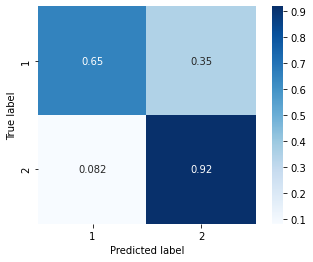

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8272910372608258

              precision    recall  f1-score   support

           0     0.7836    0.6371    0.7028      1273
           1     0.8427    0.9170    0.8783      2699

    accuracy                         0.8273      3972
   macro avg     0.8131    0.7770    0.7905      3972
weighted avg     0.8237    0.8273    0.8220      3972



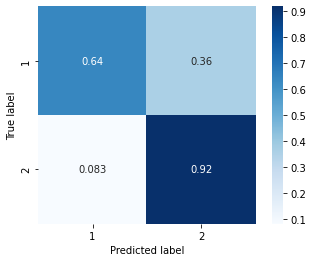

In [13]:
evaluate_bert_model(model_bert_base_cased_32, model_name="bert_base_cased_32")

In [14]:
model_bert_base_cased_64 = \
ClassificationModel('bert',
                    'bert-base-cased',
                    args={"output_dir": "outputs_bert_base_cased_64/",
                          "best_model_dir": "outputs_bert_base_cased_64/best_model/",
                          "max_seq_length": 64,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [15]:
model_bert_base_cased_64.train_model(train_df)

  0%|          | 0/9268 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

(580, 0.49516086742795745)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8533664220975399

              precision    recall  f1-score   support

           0     0.8343    0.7055    0.7645      3127
           1     0.8610    0.9287    0.8935      6141

    accuracy                         0.8534      9268
   macro avg     0.8477    0.8171    0.8290      9268
weighted avg     0.8520    0.8534    0.8500      9268



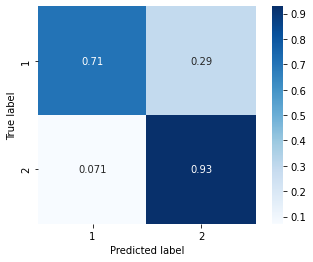

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8076535750251762

              precision    recall  f1-score   support

           0     0.7341    0.6269    0.6763      1273
           1     0.8354    0.8929    0.8632      2699

    accuracy                         0.8077      3972
   macro avg     0.7847    0.7599    0.7697      3972
weighted avg     0.8029    0.8077    0.8033      3972



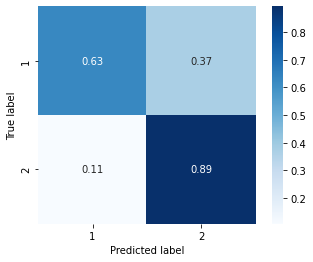

In [16]:
evaluate_bert_model(model_bert_base_cased_64, model_name="bert_base_cased_64")

In [17]:
model_bert_base_cased_128 = \
ClassificationModel('bert',
                    'bert-base-cased',   
                    args={"output_dir": "outputs_bert_base_cased_128/",
                          "best_model_dir": "outputs_bert_base_cased_128/best_model/",
                          "max_seq_length": 128,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [18]:
model_bert_base_cased_128.train_model(train_df)

  0%|          | 0/9268 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

(580, 0.49439426783857676)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8507768666378939

              precision    recall  f1-score   support

           0     0.8047    0.7365    0.7691      3127
           1     0.8714    0.9090    0.8898      6141

    accuracy                         0.8508      9268
   macro avg     0.8380    0.8227    0.8294      9268
weighted avg     0.8489    0.8508    0.8491      9268



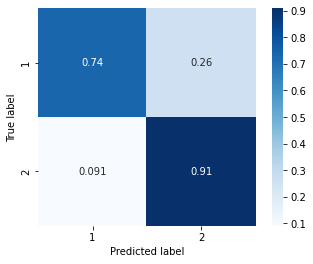

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8079053373615307

              precision    recall  f1-score   support

           0     0.7161    0.6638    0.6890      1273
           1     0.8467    0.8759    0.8610      2699

    accuracy                         0.8079      3972
   macro avg     0.7814    0.7698    0.7750      3972
weighted avg     0.8048    0.8079    0.8059      3972



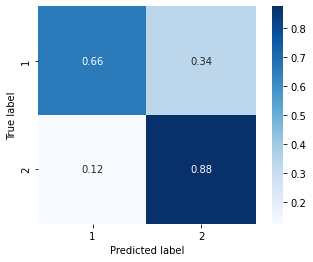

In [19]:
evaluate_bert_model(model_bert_base_cased_128, model_name="bert_base_cased_128")



---


### **2.2.2 Cased Large BERT**


---



In [20]:
model_bert_large_cased = \
ClassificationModel('bert',
                    'bert-large-cased',
                    args={"output_dir": "outputs_bert_large_cased/",
                          "best_model_dir": "outputs_bert_large_cased/best_model/",
                          "max_seq_length": 128,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at 

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [21]:
model_bert_large_cased.train_model(test_df)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

(580, 0.517913371941139)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8416055243849806

              precision    recall  f1-score   support

           0     0.8234    0.6754    0.7421      3127
           1     0.8486    0.9262    0.8857      6141

    accuracy                         0.8416      9268
   macro avg     0.8360    0.8008    0.8139      9268
weighted avg     0.8401    0.8416    0.8373      9268



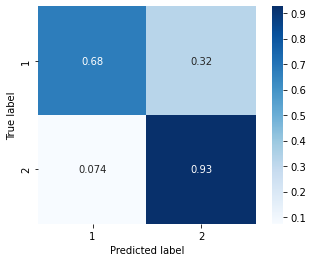

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8048841893252769

              precision    recall  f1-score   support

           0     0.7331    0.6151    0.6689      1273
           1     0.8313    0.8944    0.8617      2699

    accuracy                         0.8049      3972
   macro avg     0.7822    0.7547    0.7653      3972
weighted avg     0.7998    0.8049    0.7999      3972



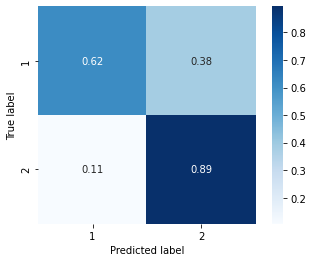

In [22]:
evaluate_bert_model(model_bert_large_cased, model_name="model_bert_large_cased")



---


### **2.2.3 RoBERTa**



---



In [23]:
model_roberta_base_128 = \
ClassificationModel('roberta', 
                    'roberta-base',
                    args={"output_dir": "outputs_roberta_base/",
                          "best_model_dir": "outputs_roberta_base/best_model/",
                          "max_seq_length": 128,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 10000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 10000,
                          "save_model_every_epoch": True,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [24]:
model_roberta_base_128.train_model(train_df)

  0%|          | 0/9268 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

(580, 0.49152352645479397)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8411739318083729

              precision    recall  f1-score   support

           0     0.7631    0.7675    0.7653      3127
           1     0.8813    0.8787    0.8800      6141

    accuracy                         0.8412      9268
   macro avg     0.8222    0.8231    0.8226      9268
weighted avg     0.8414    0.8412    0.8413      9268



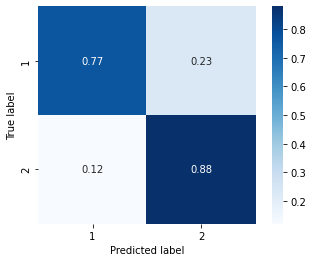

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.803877139979859

              precision    recall  f1-score   support

           0     0.6888    0.7078    0.6982      1273
           1     0.8604    0.8492    0.8547      2699

    accuracy                         0.8039      3972
   macro avg     0.7746    0.7785    0.7765      3972
weighted avg     0.8054    0.8039    0.8046      3972



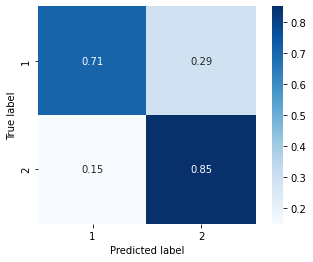

In [25]:
evaluate_bert_model(model_roberta_base_128, model_name="model_roberta_base_128")